In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.float_format = '{:,.2f}'.format

In [18]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


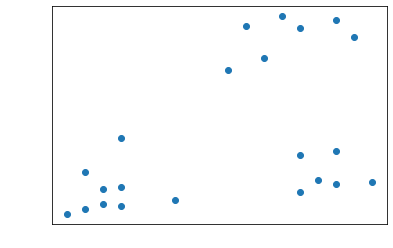

In [19]:
plt.scatter(df['Age'], df['Income($)'])

We can clearly see that there are 3 clusters in the data

In [20]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [21]:
# directly fit and predicting here, except the name column because its irrelevlant in numerical computation.
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [22]:
df['cluster'] = y_predicted
df

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


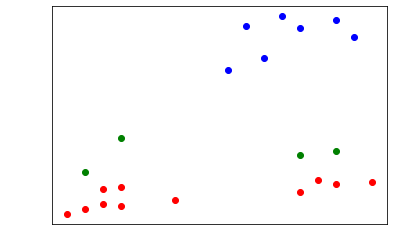

In [23]:
df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]

plt.scatter(df0['Age'], df0['Income($)'], color = 'red')
plt.scatter(df1['Age'], df1['Income($)'], color = 'blue')
plt.scatter(df2['Age'], df2['Income($)'], color = 'green')

In [24]:
# Preprocessing using min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

df

,Name,Age,Income($),cluster
0,Rob,0.06,0.21,2
1,Michael,0.18,0.38,2
2,Mohan,0.18,0.14,0
3,Ismail,0.12,0.13,0
4,Kory,0.94,0.90,1
5,Gautam,0.76,0.94,1
6,David,0.88,0.98,1
7,Andrea,0.71,1.00,1
8,Brad,0.59,0.95,1
9,Angelina,0.53,0.73,1


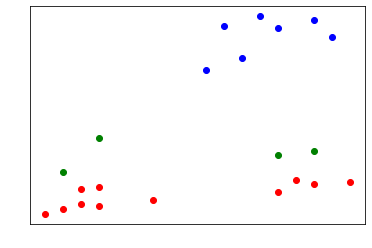

In [25]:
df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]

plt.scatter(df0['Age'], df0['Income($)'], color = 'red')
plt.scatter(df1['Age'], df1['Income($)'], color = 'blue')
plt.scatter(df2['Age'], df2['Income($)'], color = 'green')


In [26]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [27]:
df['cluster'] = y_predicted

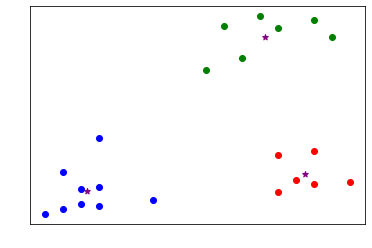

In [29]:
df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]

plt.scatter(df0.Age, df0['Income($)'], color = 'red')
plt.scatter(df1.Age, df1['Income($)'], color = 'blue')
plt.scatter(df2.Age, df2['Income($)'], color = 'green')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

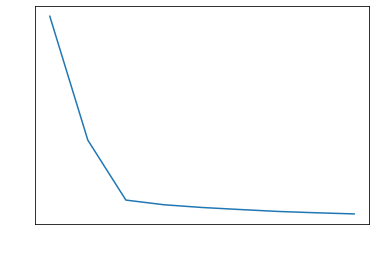

In [31]:
# Finding the number of clusters in the data set
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

# Wherever the elbow of the graph is, thats how many clusters are present in the data set.